# Polarity and Wordcloud Code

In [2]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import word_tokenize
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
# https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
business = pd.read_csv("yelp_business.csv", encoding= 'unicode_escape')
review = pd.read_csv("yelp_reviews.csv", encoding= 'unicode_escape')
business = business[business["business_id"].str.contains("#NAME?")==False]
review = review[review["business_id"].str.contains("#NAME?")==False]

In [4]:
cuisines = business[business['categories'].str.contains("Food, Restaurants", na = False)]

indian = cuisines[cuisines['categories'].str.contains("Indian")]
indian['cuisine'] = 'Indian'
#print(indian)
chinese = cuisines[cuisines['categories'].str.contains("Chinese")]
chinese['cuisine'] = "Chinese"
thai = cuisines[cuisines['categories'].str.contains("Thai")]
thai['cuisine'] = 'Thai'
italian = cuisines[cuisines['categories'].str.contains("Italian")]
italian['cuisine'] = 'Italian'
mexican = cuisines[cuisines['categories'].str.contains("Mexican")]
mexican['cuisine'] = 'Mexican'

cuisines = pd.concat([indian, chinese, thai, italian, mexican])
#cuisines = cuisines[['name', 'stars', 'cuisine', 'business_id', 'is_open']]

print(cuisines)

                   business_id                                 name  \
1275    N1ZXhAVzOzbyCBPEXTaUUw  Tandoor Authentic Indian Restaurant   
1774    3Ry5aKcMuTdp9m1E7n_WiA                Jaipur Indian Cuisine   
3723    iHC-f9m5EEOIJMXCW3bmBA              Swagruha Indian Cuisine   
7776    yDiWYpuzRxcTgSi_O4JZpQ                       Masala Kitchen   
9474    6HCuq-HhycCP6FAEOozybg                               Haweli   
...                        ...                                  ...   
147977  yhwFwTqoH_cou9BnM1lkBw                      Jack in the Box   
148658  YQmSQs0WDwMDLmU3Yfj0jw                        El Pollo Loco   
149684  27eH5ZI6JvEIW66QadM8EA               Chipotle Mexican Grill   
150087  hezQG50YXqdgxkhl2R9OuQ                            Taco Bell   
150102  y77Rf5aezhj92pi1juN93g               Cielito Lindo Taqueria   

                              address              city state postal_code  \
1275                    106 S 40th St      Philadelphia    PA       19

C:\Users\erika\AppData\Local\Temp\ipykernel_23224\3170566856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian['cuisine'] = 'Indian'
C:\Users\erika\AppData\Local\Temp\ipykernel_23224\3170566856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chinese['cuisine'] = "Chinese"
C:\Users\erika\AppData\Local\Temp\ipykernel_23224\3170566856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [5]:
merged = cuisines.merge(review, left_on='business_id', right_on='business_id')
merged = merged[['name', 'stars_y', 'cuisine', 'business_id', 'text', 'categories']]
print(cuisines)

                   business_id                                 name  \
1275    N1ZXhAVzOzbyCBPEXTaUUw  Tandoor Authentic Indian Restaurant   
1774    3Ry5aKcMuTdp9m1E7n_WiA                Jaipur Indian Cuisine   
3723    iHC-f9m5EEOIJMXCW3bmBA              Swagruha Indian Cuisine   
7776    yDiWYpuzRxcTgSi_O4JZpQ                       Masala Kitchen   
9474    6HCuq-HhycCP6FAEOozybg                               Haweli   
...                        ...                                  ...   
147977  yhwFwTqoH_cou9BnM1lkBw                      Jack in the Box   
148658  YQmSQs0WDwMDLmU3Yfj0jw                        El Pollo Loco   
149684  27eH5ZI6JvEIW66QadM8EA               Chipotle Mexican Grill   
150087  hezQG50YXqdgxkhl2R9OuQ                            Taco Bell   
150102  y77Rf5aezhj92pi1juN93g               Cielito Lindo Taqueria   

                              address              city state postal_code  \
1275                    106 S 40th St      Philadelphia    PA       19

## Polarity

In [6]:
slay = merged
slay['polarity'] = slay['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
slay['subjectivity'] = slay['text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [7]:
print(slay.groupby(['cuisine']).mean())
print(slay.groupby(['stars_y']).mean())

          stars_y  polarity  subjectivity
cuisine                                  
Chinese  3.914550  0.255433      0.589280
Indian   3.444444  0.241191      0.577197
Italian  4.287908  0.280938      0.552826
Mexican  3.740476  0.232161      0.556116
Thai     4.833333  0.322526      0.596607
         polarity  subjectivity
stars_y                        
1       -0.060290      0.534601
2        0.081451      0.542816
3        0.190601      0.556256
4        0.264821      0.562373
5        0.351489      0.580440


<AxesSubplot:xlabel='cuisine', ylabel='polarity'>

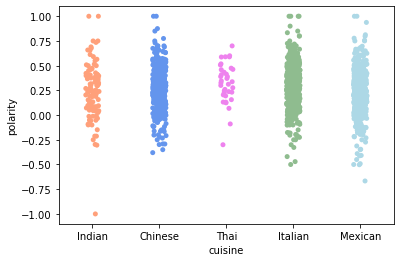

In [10]:
sns.stripplot(x = 'cuisine', y = 'polarity', data = slay, palette=['lightsalmon', 'cornflowerblue', 'violet', 'darkseagreen', 'lightblue'])

<AxesSubplot:xlabel='stars_y', ylabel='polarity'>

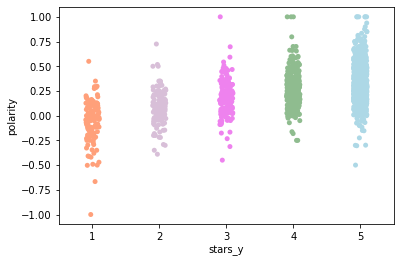

In [9]:
sns.stripplot(x = 'stars_y', y = 'polarity', data = slay, palette=['lightsalmon', 'thistle', 'violet', 'darkseagreen', 'lightblue'])

# Wordcloud

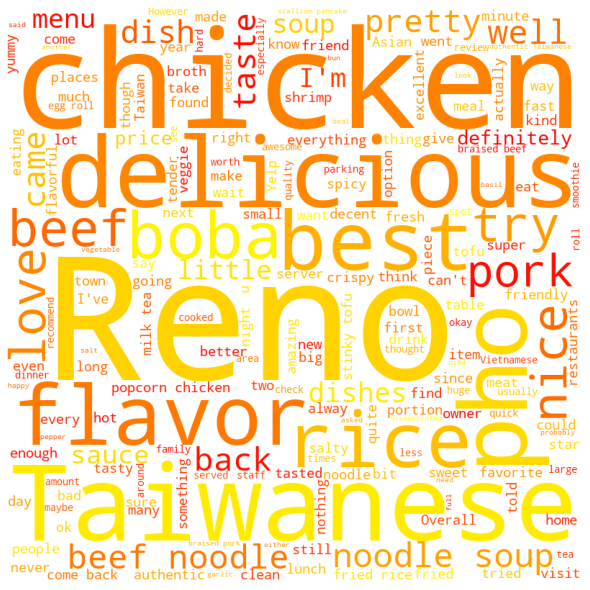

In [16]:
china = merged[merged['cuisine'] == 'Chinese']
china_text = ""
for i in range(len(china)):
    china_text += (china['text'].iloc[i])
    
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append('food')
stopwords.append('place')
stopwords.append('get')
stopwords.append('great')
stopwords.append('good')
stopwords.append('like')
stopwords.append('one')
stopwords.append('time')
stopwords.append('service')
stopwords.append('would')
stopwords.append('ordered')
stopwords.append('order')
stopwords.append('really')
stopwords.append('also')
stopwords.append('go')
stopwords.append('got')
stopwords.append('Indian')
stopwords.append('chinese')
stopwords.append('Italian')
stopwords.append('Mexican')
stopwords.append('Thai')
stopwords.append('restaurant')

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = 'autumn',
                stopwords = stopwords,
                min_font_size = 10).generate(china_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


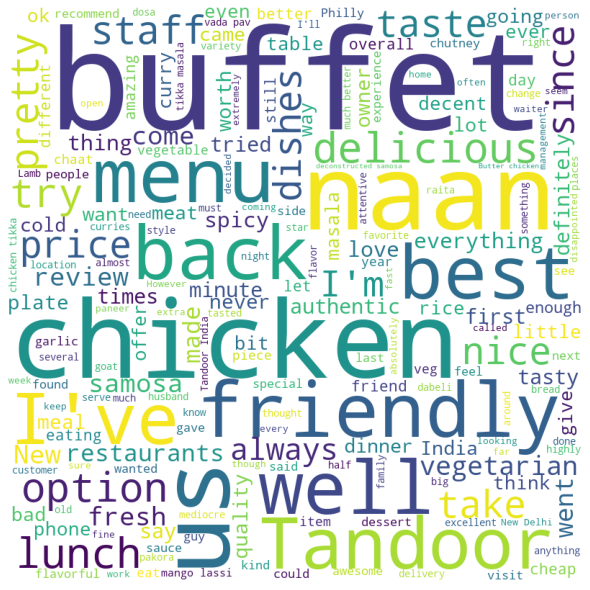

In [17]:
india = merged[merged['cuisine'] == 'Indian']
india_text = ""
for i in range(len(india)):
    india_text += (india['text'].iloc[i])
    
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      colormap='viridis',
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(india_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


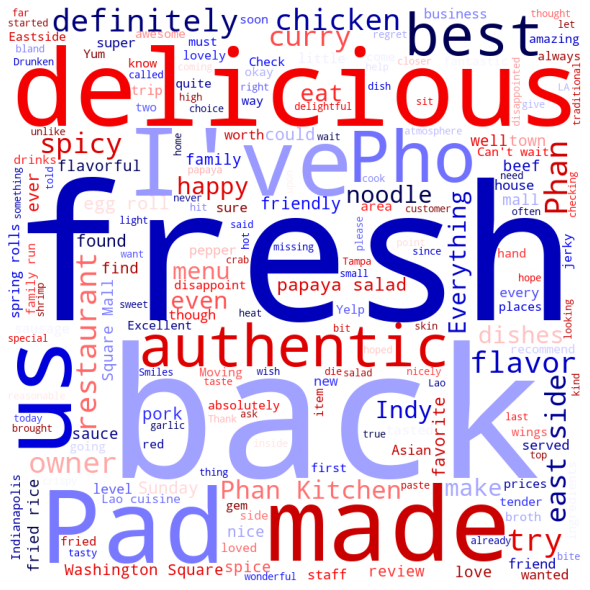

In [262]:
thai = merged[merged['cuisine'] == 'Thai']
thai_text = ""
for i in range(len(thai)):
    thai_text += (thai['text'].iloc[i])

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      colormap='seismic',
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(thai_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

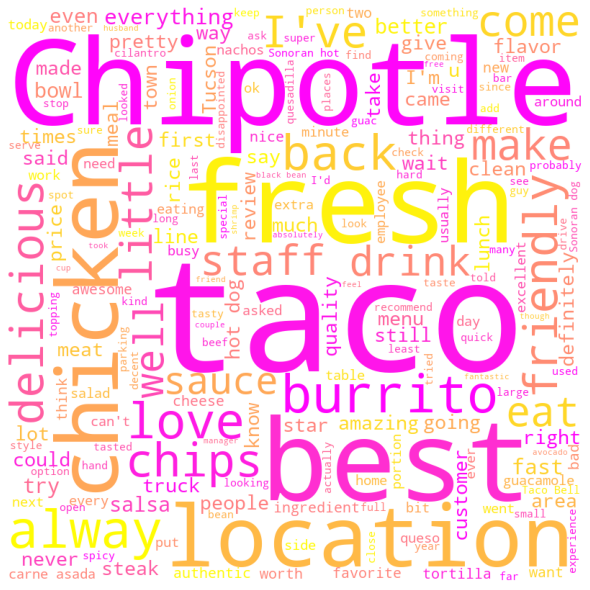

In [18]:
mexico = merged[merged['cuisine'] == 'Mexican']
mexico_text = ""
for i in range(len(mexico)):
    mexico_text += (mexico['text'].iloc[i])
    
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      colormap='spring',
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(mexico_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# The rest is other exploration that we didn't include in the write-up

([<matplotlib.patches.Wedge at 0x1855f6c1c70>,
 [Text(-0.7661171288319105, 0.7893443766255323, 'open'),
  Text(0.7661170549281529, -0.7893444483545912, 'closed')])

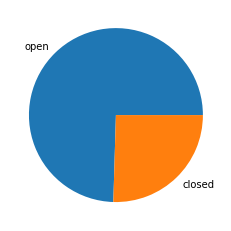

In [51]:
total = len(cuisines)
is_open = len(cuisines[cuisines['is_open'] == 1])
is_closed = len(cuisines[cuisines['is_open'] == 0])
data = [is_open/total, is_closed/total]
labels = ['open', 'closed']
plt.pie(data, labels = labels)

In [252]:
# are restaurants that are closed have worse ratings?
closed = cuisines[cuisines['is_open'] == 0]
closed.groupby('cuisine').mean()

,latitude,longitude,stars,review_count,is_open
cuisine,,,,,
Chinese,38.752995,-91.560948,3.529412,45.323529,0.0
Indian,37.916900,-82.196416,3.821429,36.964286,0.0
Italian,35.911732,-86.844811,3.653226,66.548387,0.0
Mexican,35.401299,-90.418936,3.282258,47.435484,0.0
Thai,36.498231,-80.609155,3.846154,41.846154,0.0


In [253]:
closed = cuisines[cuisines['is_open'] == 1]
closed.groupby('cuisine').mean()

,latitude,longitude,stars,review_count,is_open
cuisine,,,,,
Chinese,38.604213,-91.862700,3.154545,141.509091,1.0
Indian,43.019988,-95.444684,3.847222,92.500000,1.0
Italian,37.904186,-84.923171,3.571429,140.183673,1.0
Mexican,36.170099,-93.249985,3.185455,73.716364,1.0
Thai,38.390148,-91.460245,3.892857,152.357143,1.0
